#Import packages

In [3]:
import pandas as pd
import numpy as np 
from sklearn.utils import resample
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("ggplot")
import plotly.express as px


#Read Data

In [4]:
df1=pd.read_csv("/content/CC_defaultsdataset.csv")
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .; X11 = the repayment status in April, 2005.

 The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



# Exploratory Data Analysis

In [5]:
df1.shape

(30000, 25)

In [6]:
df1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
df1["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

##Descriptive statistics

In [8]:
df1.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Observations:
1. Imbalance class in output feature variable
2. no missing values
3. Data not absolutely normal , but close to normal distribution


##Visualizations

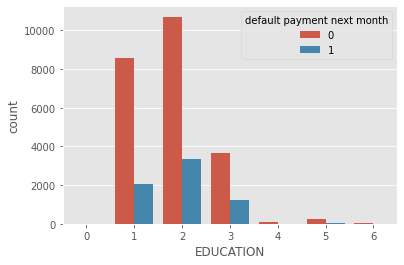

In [10]:
sns.countplot(x=df1["EDUCATION"], hue=df1["default payment next month"])


(1 = graduate school; 2 = university; 3 = high school; 4 = others)

university students have highest defaults

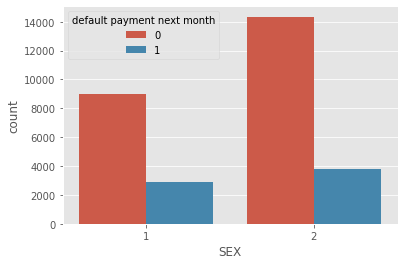

In [11]:
sns.countplot(x=df1["SEX"], hue=df1["default payment next month"] )

Gender (1 = male; 2 = female).

more defaults by females 

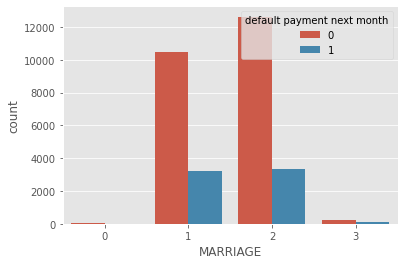

In [12]:
sns.countplot(x=df1["MARRIAGE"], hue=df1["default payment next month"] )

Marital status (1 = married; 2 = single; 3 = others)

equal number of defaults in married and singles

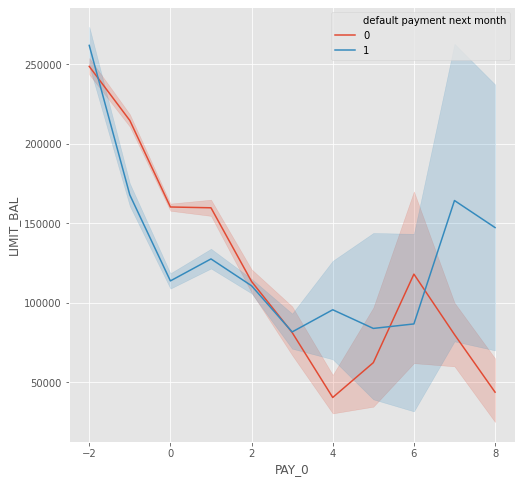

In [14]:
plt.figure(figsize=(8,8))
sns.lineplot(x=df1["PAY_0"], y=df1["LIMIT_BAL"], markers=True, hue=df1["default payment next month"],dashes=True )

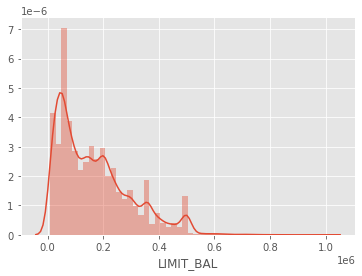

In [16]:
sns.distplot(df1["LIMIT_BAL"], hist=True)

maximum loans are within range of 0.0 to 0.2 balance

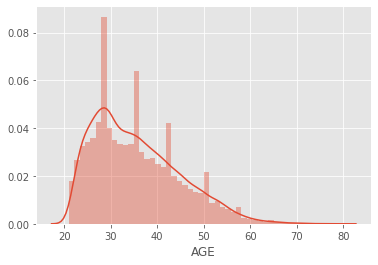

In [17]:
sns.distplot(df1["AGE"], hist=True)

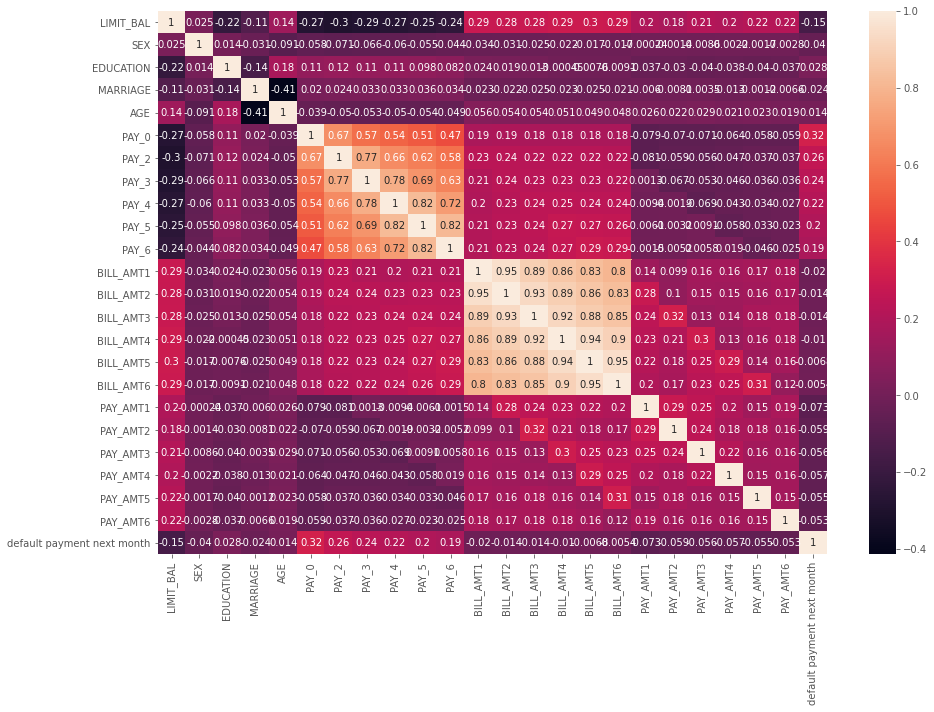

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df1[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']].corr(), annot=True)

pay 2, pay 3, pay 4,pay 5 and pay 6 ..highly correlated wiht each other , less correlated with target variable 
Bill Amt1,2,3,4,5,6 highly correlated with each other , less correlated with target variable 
payment amt - less corelated with each other , good correlation with target variable 

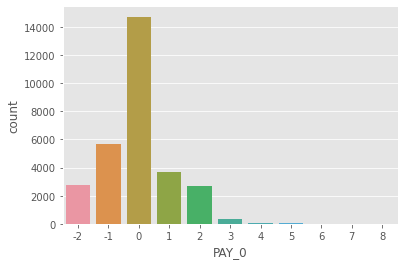

In [20]:
sns.countplot(x=df1["PAY_0"])

The measurement scale for the repayment status is: 
-1 = pay duly; 
1 = payment delay for one month; 
2 = payment delay for two months; . . .; 
8 = payment delay for eight months; 
9 = payment delay for nine months and above.

Pay 0-6 have delays between (-2 +2)  range, 0 being highest 

In [22]:
#data cleaning

del df1["ID"]

#Imbalance Class: class weight

In [23]:
df1["default_payment"]=df1["default payment next month"]

##Train-Test Split 

In [24]:
#train , test data sets
y=df1.default_payment
df1.drop(["default payment next month","default_payment"], axis=1, inplace=True)
X=df1

In [26]:
#data normalization 
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
sca_train=sca.fit_transform(X)
#sca_test=sca.fit_transform(y)
sca_train=pd.DataFrame (sca_train, index=df1.index, columns=df1.columns)

In [29]:
#traintest split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(sca_train,y, test_size=0.20, random_state=5)

##Logistic Regression 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score,roc_curve

In [30]:
lr=LogisticRegression(random_state=10,class_weight="balanced")
lr.fit(X_train,y_train )
lr_pred= lr.predict(X_test)



In [31]:
#fnction to calculate metrics 
def evaluate(model,test, pred):
 print ("Accuracy score traindata ", accuracy_score(test, pred))
 print ("classification report of","\n",  classification_report(test, pred))
 print ("confusion matrix report of", "\n", confusion_matrix(test, pred))
 print ("Cross tab","\n", pd.crosstab(test,pred))


In [32]:
#model evaluation
evaluate(lr,y_test,lr_pred)

Accuracy score traindata  0.7001666666666667
classification report of 
               precision    recall  f1-score   support

           0       0.88      0.71      0.79      4661
           1       0.40      0.65      0.49      1339

    accuracy                           0.70      6000
   macro avg       0.64      0.68      0.64      6000
weighted avg       0.77      0.70      0.72      6000

confusion matrix report of 
 [[3327 1334]
 [ 465  874]]
Cross tab 
 col_0               0     1
default_payment            
0                3327  1334
1                 465   874


roc auc score for train data 
 0.7220242899270878
roc auc score for test data  
 0.7337354646528268


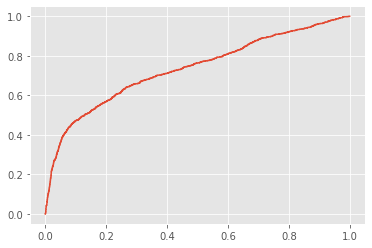

In [43]:
#roc curve, rocauc score
fpr,tpr,thresholds=roc_curve(y_test,lr.predict_proba(X_test)[:,1])
print (plt.plot(fpr,tpr))
print ("roc auc score for train data","\n", roc_auc_score(y_train,lr.predict_proba(X_train)[:,1]))
print ("roc auc score for test data ", "\n",roc_auc_score(y_test,lr.predict_proba(X_test)[:,1]))

In [37]:
imp=(lr.coef_)
imp

array([[-0.09897564, -0.0566124 , -0.07177538, -0.06647186,  0.08878566,
         0.56123636,  0.11805203,  0.06524244,  0.02022511,  0.03690654,
        -0.00691759, -0.40600372,  0.22688996,  0.0963304 , -0.02544055,
        -0.01262455,  0.02664497, -0.2549764 , -0.12711485, -0.04935816,
        -0.03714242, -0.03678057, -0.0292364 ]])

##Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier


In [39]:
dt=DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=3,min_samples_leaf=2,random_state=10,max_features=10,class_weight="balanced")
dt.fit(X_train,y_train)
dt_pred= dt.predict(X_test)

In [40]:
evaluate (dt,y_test,dt_pred)

Accuracy score traindata  0.7425
classification report of 
               precision    recall  f1-score   support

           0       0.87      0.78      0.83      4661
           1       0.44      0.60      0.51      1339

    accuracy                           0.74      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.74      0.75      6000

confusion matrix report of 
 [[3656 1005]
 [ 540  799]]
Cross tab 
 col_0               0     1
default_payment            
0                3656  1005
1                 540   799


In [44]:
#roc - auc cscore
fpr,tpr,thresholds=roc_curve(y_test, dt.predict_proba(X_test)[:,1])
#plt.plot(fpr,tpr)
dt_score= roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
dt_score

0.7432344631433123

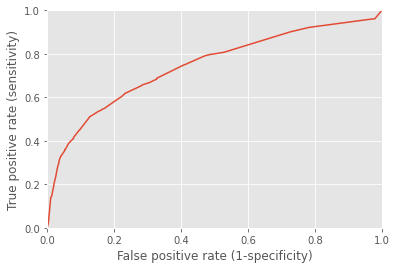

In [45]:
#roc curve
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("False positive rate (1-specificity)")
plt.ylabel("True positive rate (sensitivity)")
plt.grid(True)


##Feature importances

In [46]:
feat_imp=pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_imp

PAY_2        0.420128
PAY_0        0.209127
PAY_AMT4     0.062038
PAY_AMT2     0.049747
PAY_4        0.041087
PAY_6        0.034298
BILL_AMT1    0.029472
PAY_5        0.016971
PAY_AMT6     0.016826
LIMIT_BAL    0.016174
PAY_AMT3     0.014525
BILL_AMT2    0.012922
PAY_AMT5     0.011016
BILL_AMT3    0.010695
BILL_AMT5    0.010451
PAY_AMT1     0.009211
BILL_AMT6    0.008166
BILL_AMT4    0.006911
AGE          0.006325
PAY_3        0.006061
EDUCATION    0.005574
MARRIAGE     0.002276
SEX          0.000000
dtype: float64

##Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=8, min_samples_split=5, min_samples_leaf=3,random_state=10,class_weight="balanced")
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

#model evaluation
evaluate(rf,y_test,rf_pred)

Accuracy score traindata  0.782
classification report of 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      4661
           1       0.51      0.59      0.55      1339

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000

confusion matrix report of 
 [[3901  760]
 [ 548  791]]
Cross tab 
 col_0               0    1
default_payment           
0                3901  760
1                 548  791


roc auc score for train data 
 0.8182257949852746
roc auc score for test data  
 0.7867700440901324


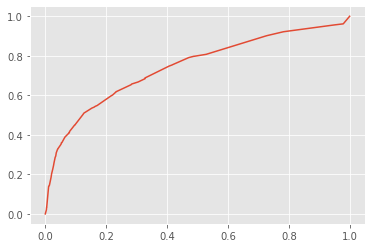

In [48]:
#roc curve, roc-auc score
roc_curve(y_test,rf.predict_proba(X_test)[:,1])
print (plt.plot(fpr,tpr))
print ("roc auc score for train data","\n", roc_auc_score(y_train,rf.predict_proba(X_train)[:,1]))
print ("roc auc score for test data ", "\n",roc_auc_score(y_test,rf.predict_proba(X_test)[:,1]))


##Feature importances

In [49]:
rf_feat=pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rf_feat

PAY_0        0.262078
PAY_2        0.139790
PAY_3        0.072920
PAY_5        0.057339
PAY_4        0.052869
LIMIT_BAL    0.044942
PAY_AMT1     0.042872
PAY_AMT2     0.034787
PAY_AMT3     0.032675
BILL_AMT1    0.032250
PAY_6        0.029626
PAY_AMT4     0.026697
BILL_AMT2    0.026299
PAY_AMT6     0.025037
BILL_AMT3    0.020719
PAY_AMT5     0.020368
BILL_AMT5    0.019455
BILL_AMT4    0.018844
BILL_AMT6    0.016736
AGE          0.014046
EDUCATION    0.005118
SEX          0.002267
MARRIAGE     0.002266
dtype: float64

#Imbalance Class : Upsampling minority **class**

##Train-Test split 

In [ ]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

##Upsampling 

In [55]:
#step1: first combine train data 
X=pd.concat([X_train,y_train], axis=1)
X.shape

(24000, 24)

In [57]:
#step2: seperate majornity and minority class
not_default = X[X.default_payment==0]
default=X[X.default_payment==1]

In [58]:
#step3: upsample minority class, here is default==1
upsample = resample(default, replace= True,n_samples= len(not_default), random_state=5 )

In [59]:
X_upsampled= pd.concat([not_default,upsample])

In [60]:
X_upsampled.shape

(37406, 24)

In [62]:
#split upsampled data into train and testdata
yu_train = X_upsampled.default_payment
X_upsampled.drop(["default_payment"],  axis=1, inplace=True)
Xu_train=X_upsampled

In [63]:
yu_train.shape

(37406,)

In [64]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
Xu_train= sca.fit_transform(Xu_train)
X_test= sca.fit_transform (X_test)
Xu_train=pd.DataFrame(Xu_train, index=X_upsampled.index, columns=X_upsampled.columns)

In [65]:
X_test=pd.DataFrame(X_test, columns=X_upsampled.columns)

In [66]:
X_test.shape

(6000, 23)

##Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=10)
lr.fit(Xu_train,yu_train)
lr_pred= lr.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score,classification_report, roc_curve,roc_auc_score

Accuracy score 0.5888333333333333
---------------------------------------------------
col_0               0     1
default_payment            
0                2540  2121
1                 346   993
---------------------------------------------------
classification report 
               precision    recall  f1-score   support

           0       0.88      0.54      0.67      4661
           1       0.32      0.74      0.45      1339

    accuracy                           0.59      6000
   macro avg       0.60      0.64      0.56      6000
weighted avg       0.75      0.59      0.62      6000

------------------------------------------------------------------
roc score_train 0.7193179932148457
roc score_test 0.7329793453984479


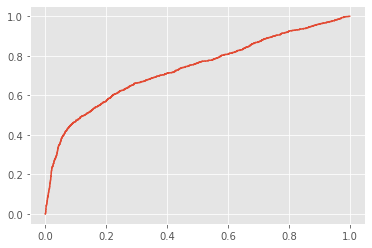

In [69]:
print ("Accuracy score", accuracy_score(y_test,lr_pred))
print ("---------------------------------------------------")
print (pd.crosstab (y_test,lr_pred))
print ("---------------------------------------------------")
print ("classification report","\n",classification_report(y_test, lr_pred))
fpr,tpr,thresholds= roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)
print("------------------------------------------------------------------")
print ("roc score_train", roc_auc_score(yu_train, lr.predict_proba(Xu_train)[:,1]))
print ("roc score_test", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=12)
dt_fit=dt.fit(Xu_train,yu_train)
dt_pred=dt_fit.predict(X_test)

Accuracy score 0.7425
---------------------------------------------------
col_0               0     1
default_payment            
0                3656  1005
1                 540   799
---------------------------------------------------
classification report 
               precision    recall  f1-score   support

           0       0.87      0.78      0.83      4661
           1       0.44      0.60      0.51      1339

    accuracy                           0.74      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.74      0.75      6000

------------------------------------------------------------------
roc score_train 0.7461105169864721
roc score_test 0.7347282417030774


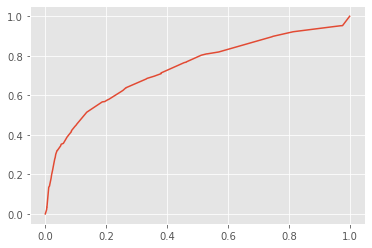

In [70]:
print ("Accuracy score", accuracy_score(y_test,dt_pred))
print ("---------------------------------------------------")
print (pd.crosstab (y_test,dt_pred))
print ("---------------------------------------------------")
print ("classification report","\n",classification_report(y_test, dt_pred))
fpr,tpr,thresholds= roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)
print("------------------------------------------------------------------")
print ("roc score_train", roc_auc_score(yu_train, dt.predict_proba(Xu_train)[:,1]))
print ("roc score_test", roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))

##Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150, criterion="entropy", max_depth=8, random_state=15, max_features="sqrt")
rf_fit= rf.fit(Xu_train,yu_train)
rf_pred= rf_fit.predict(X_test)

Accuracy score 0.7626666666666667
---------------------------------------------------
col_0               0    1
default_payment           
0                3752  909
1                 515  824
---------------------------------------------------
classification report 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      4661
           1       0.48      0.62      0.54      1339

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000

------------------------------------------------------------------
roc score_train 0.8232686289296703
roc score_test 0.7826429532457448


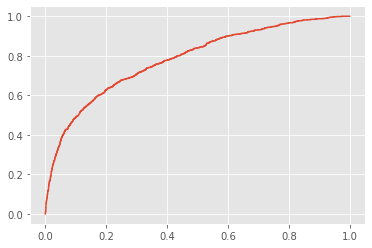

In [72]:
print ("Accuracy score", accuracy_score(y_test,rf_pred))
print ("---------------------------------------------------")
print (pd.crosstab (y_test,rf_pred))
print ("---------------------------------------------------")
print ("classification report","\n",classification_report(y_test, rf_pred))
fpr,tpr,thresholds= roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)
print("------------------------------------------------------------------")
print ("roc score_train", roc_auc_score(yu_train, rf.predict_proba(Xu_train)[:,1]))
print ("roc score_test", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

##Random Forest- Gridsearch

In [73]:
#gridsearch
from sklearn.model_selection import GridSearchCV
param={"criterion": ["gini"],
       "n_estimators":range(5,10,15), 
       "max_depth":[8,10,12],
       "min_samples_split":[2,8,12],
       "min_samples_leaf":[2,4,6],
       "max_features":["auto","sqrt"] }


In [74]:
rf_gs=GridSearchCV(rf, param, cv=5,n_jobs=-1, verbose=1)
rf_gs.fit(Xu_train,yu_train)
rf_gs_pred= rf_gs.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   51.7s finished


In [75]:
print ("Accuracy score", accuracy_score(y_test,rf_gs_pred))
print ("---------------------------------------------------")
print (pd.crosstab (y_test,rf_gs_pred))
print ("---------------------------------------------------")
print ("classification report","\n",classification_report(y_test, rf_gs_pred))


Accuracy score 0.7263333333333334
---------------------------------------------------
col_0               0     1
default_payment            
0                3540  1121
1                 521   818
---------------------------------------------------
classification report 
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      4661
           1       0.42      0.61      0.50      1339

    accuracy                           0.73      6000
   macro avg       0.65      0.69      0.66      6000
weighted avg       0.77      0.73      0.74      6000



##XGBoost

In [76]:
import xgboost as xgb
xgb= xgb.XGBClassifier(max_depth=8,learning_rate=0.1, min_samples_leaf=5, n_estimators=10,random_state=12)
xgb.fit(Xu_train,yu_train)
xgb_pred=xgb.predict(X_test)

Accuracy score 0.7703333333333333
---------------------------------------------------
col_0               0    1
default_payment           
0                3876  785
1                 593  746
---------------------------------------------------
classification report 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      4661
           1       0.49      0.56      0.52      1339

    accuracy                           0.77      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.77      0.78      6000

------------------------------------------------------------------
roc score_train 0.8505545015011612
roc score_test 0.7608078667166367


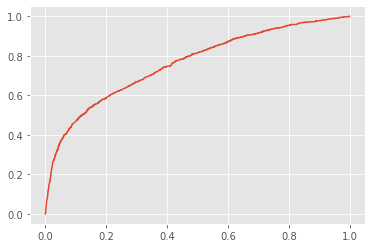

In [77]:
print ("Accuracy score", accuracy_score(y_test,xgb_pred))
print ("---------------------------------------------------")
print (pd.crosstab (y_test,xgb_pred))
print ("---------------------------------------------------")
print ("classification report","\n",classification_report(y_test, xgb_pred))
fpr,tpr,thresholds= roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)
print("------------------------------------------------------------------")
print ("roc score_train", roc_auc_score(yu_train, xgb.predict_proba(Xu_train)[:,1]))
print ("roc score_test", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))

##Knn Neighbors

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)
k_fit=knn.fit(Xu_train,yu_train)
k_pred= knn.predict(X_test)

In [79]:
#model evaluation using crossvalidation
from sklearn.model_selection import cross_val_score
k_score=cross_val_score(k_fit, X_test,y_test, cv=5)
print ("Cross validation score :", k_score)
print ("Cross validation mean :", k_score.mean())


Cross validation score : [0.80833333 0.80416667 0.805      0.8025     0.80333333]
Cross validation mean : 0.8046666666666666


Accuracy score 0.6843333333333333
---------------------------------------------------
col_0               0     1
default_payment            
0                3316  1345
1                 549   790
---------------------------------------------------
classification report 
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      4661
           1       0.37      0.59      0.45      1339

    accuracy                           0.68      6000
   macro avg       0.61      0.65      0.62      6000
weighted avg       0.75      0.68      0.71      6000

------------------------------------------------------------------
roc score_train 0.8827071486561138
roc score_test 0.7108253236339421


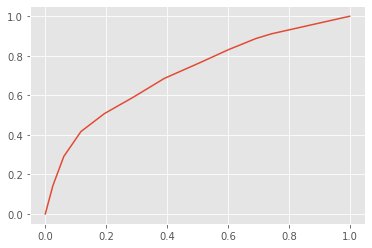

In [80]:
print ("Accuracy score", accuracy_score(y_test,k_pred))
print ("---------------------------------------------------")
print (pd.crosstab (y_test,k_pred))
print ("---------------------------------------------------")
print ("classification report","\n",classification_report(y_test, k_pred))
fpr,tpr,thresholds= roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)
print("------------------------------------------------------------------")
print ("roc score_train", roc_auc_score(yu_train, knn.predict_proba(Xu_train)[:,1]))
print ("roc score_test", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))

In [81]:
k=[6,10,15,20,25,30]

for i in k:
  knn = KNeighborsClassifier(n_neighbors=i)
  k_score= cross_val_score(k_fit, X_test,y_test, cv=5)
  print ("K:", i)
  print ("Cross validation score :", str(k_score))
  print ("Cross validation mean :", k_score.mean())

K: 6
Cross validation score : [0.80833333 0.80416667 0.805      0.8025     0.80333333]
Cross validation mean : 0.8046666666666666
K: 10
Cross validation score : [0.80833333 0.80416667 0.805      0.8025     0.80333333]
Cross validation mean : 0.8046666666666666
K: 15
Cross validation score : [0.80833333 0.80416667 0.805      0.8025     0.80333333]
Cross validation mean : 0.8046666666666666
K: 20
Cross validation score : [0.80833333 0.80416667 0.805      0.8025     0.80333333]
Cross validation mean : 0.8046666666666666
K: 25
Cross validation score : [0.80833333 0.80416667 0.805      0.8025     0.80333333]
Cross validation mean : 0.8046666666666666
K: 30
Cross validation score : [0.80833333 0.80416667 0.805      0.8025     0.80333333]
Cross validation mean : 0.8046666666666666


#Imbalance class : Stratify

In [82]:
df2=pd.read_csv("/content/CC_defaultsdataset.csv")
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [83]:
del df2["ID"]
df2["default_payment"]=df2["default payment next month"]
del df2["default payment next month"]
df2


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


##Train-Test data 

In [84]:
y=df2.default_payment
df2.drop(["default_payment"],axis=1, inplace=True)
X=df2

In [86]:
from sklearn.model_selection import train_test_split
X1_train, X1_test,y1_train, y1_test=train_test_split(X,y, test_size=0.25, random_state=15, stratify=y)

In [87]:
from sklearn.preprocessing import StandardScaler
sca1=StandardScaler()
X1_train_sca= sca1.fit_transform(X1_train)
X1_train_sca= pd.DataFrame(X1_train_sca, index=X1_train.index, columns= X1_train.columns)
X1_test_sca= sca1.fit_transform(X1_test)
X1_test_sca=pd.DataFrame(X1_test_sca, index= X1_test.index, columns= X1_test.columns)

##Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

Accuracy score 0.8108
---------------------------------------------------
col_0               0    1
default_payment           
0                5684  157
1                1262  397
---------------------------------------------------
classification report 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      5841
           1       0.72      0.24      0.36      1659

    accuracy                           0.81      7500
   macro avg       0.77      0.61      0.62      7500
weighted avg       0.80      0.81      0.77      7500

------------------------------------------------------------------
roc score_train 0.7273798742606103
roc score_test 0.7170887469106736


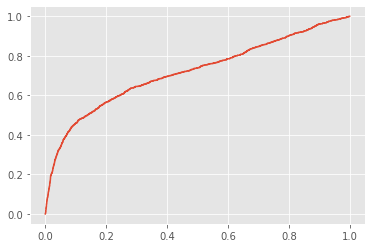

In [89]:
#logistic regression 
lr2=LogisticRegression(random_state=10)
lr2.fit(X1_train_sca,y1_train)
lr2_pred= lr2.predict(X1_test_sca)

#model evaluate
print ("Accuracy score", accuracy_score(y1_test,lr2_pred))
print ("---------------------------------------------------")
print (pd.crosstab (y1_test,lr2_pred))
print ("---------------------------------------------------")
print ("classification report","\n",classification_report(y1_test, lr2_pred))
fpr,tpr,thresholds= roc_curve(y1_test, lr2.predict_proba(X1_test_sca)[:,1])
plt.plot(fpr,tpr)
print("------------------------------------------------------------------")
print ("roc score_train", roc_auc_score(y1_train, lr2.predict_proba(X1_train_sca)[:,1]))
print ("roc score_test", roc_auc_score(y1_test, lr2.predict_proba(X1_test_sca)[:,1]))

##DecisionTree

Accuracy score 0.7298666666666667
---------------------------------------------------
col_0               0     1
default_payment            
0                4793  1048
1                 978   681
---------------------------------------------------
classification report 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      5841
           1       0.39      0.41      0.40      1659

    accuracy                           0.73      7500
   macro avg       0.61      0.62      0.61      7500
weighted avg       0.73      0.73      0.73      7500

------------------------------------------------------------------
roc score_train 0.9999994209510527
roc score_test 0.6153820672164376


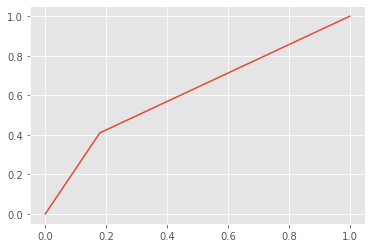

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt2=DecisionTreeClassifier(random_state=12)
dt2_fit=dt2.fit(X1_train_sca,y1_train)
dt2_pred=dt2_fit.predict(X1_test_sca)

#model evaluate
print ("Accuracy score", accuracy_score(y1_test,dt2_pred))
print ("---------------------------------------------------")
print (pd.crosstab (y1_test,dt2_pred))
print ("---------------------------------------------------")
print ("classification report","\n",classification_report(y1_test, dt2_pred))
fpr,tpr,thresholds= roc_curve(y1_test, dt2.predict_proba(X1_test_sca)[:,1])
plt.plot(fpr,tpr)
print("------------------------------------------------------------------")
print ("roc score_train", roc_auc_score(y1_train, dt2.predict_proba(X1_train_sca)[:,1]))
print ("roc score_test", roc_auc_score(y1_test, dt2.predict_proba(X1_test_sca)[:,1]))

##RandomForest

Accuracy score 0.82
---------------------------------------------------
col_0               0    1
default_payment           
0                5575  266
1                1084  575
---------------------------------------------------
classification report 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.68      0.35      0.46      1659

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

------------------------------------------------------------------
roc score_train 0.8213597993330525
roc score_test 0.7736754969108541


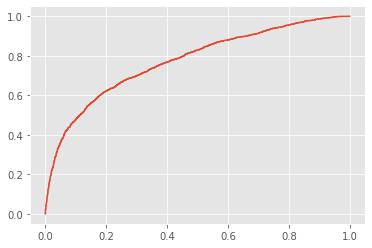

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier(n_estimators=150, criterion="entropy", max_depth=8, random_state=15, max_features="sqrt")
rf2_fit= rf2.fit(X1_train_sca,y1_train)
rf2_pred= rf2_fit.predict(X1_test_sca)

#model evaluate
print ("Accuracy score", accuracy_score(y1_test,rf2_pred))
print ("---------------------------------------------------")
print (pd.crosstab (y1_test,rf2_pred))
print ("---------------------------------------------------")
print ("classification report","\n",classification_report(y1_test, rf2_pred))
fpr,tpr,thresholds= roc_curve(y1_test, rf2.predict_proba(X1_test_sca)[:,1])
plt.plot(fpr,tpr)
print("------------------------------------------------------------------")
print ("roc score_train", roc_auc_score(y1_train, rf2.predict_proba(X1_train_sca)[:,1]))
print ("roc score_test", roc_auc_score(y1_test, rf2.predict_proba(X1_test_sca)[:,1]))

##XGBoost

In [92]:
import xgboost as xgb1
xgb1= xgb1.XGBClassifier(max_depth=8,learning_rate=0.1, min_samples_leaf=5, n_estimators=10,random_state=12)
xgb1.fit(X1_train_sca,y1_train)
xgb1_pred=xgb1.predict(X1_test_sca)


In [93]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve, roc_auc_score

Accuracy score 0.8184
---------------------------------------------------
col_0               0    1
default_payment           
0                5571  270
1                1092  567
---------------------------------------------------
classification report 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.68      0.34      0.45      1659

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500

------------------------------------------------------------------
roc score_train 0.8302785004136646
roc score_test 0.770773911301695


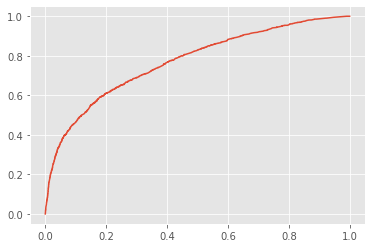

In [94]:
print ("Accuracy score", accuracy_score(y1_test,xgb1_pred))
print ("---------------------------------------------------")
print (pd.crosstab (y1_test,xgb1_pred))
print ("---------------------------------------------------")
print ("classification report","\n",classification_report(y1_test, xgb1_pred))
fpr,tpr,thresholds= roc_curve(y1_test, xgb1.predict_proba(X1_test_sca)[:,1])
plt.plot(fpr,tpr)
print("------------------------------------------------------------------")
print ("roc score_train", roc_auc_score(y1_train, xgb1.predict_proba(X1_train_sca)[:,1]))
print ("roc score_test", roc_auc_score(y1_test, xgb1.predict_proba(X1_test_sca)[:,1]))

#Imbalance Class : SMOTE

##Apply SMOTE

In [103]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio="minority")
x_sm,y_sm=smote.fit_sample(X,y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [104]:
pd.Series(y).value_counts()

0    23364
1     6636
Name: default_payment, dtype: int64

In [105]:
#smote translated imbalance to balance data
pd.Series(y_sm).value_counts()

1    23364
0    23364
dtype: int64

In [106]:
sca1=StandardScaler()
sca1_train= sca1.fit_transform(x_sm)
sca1_train=pd.DataFrame(sca1_train, columns=X.columns )

##Train-Test split

In [107]:
Xs_train,Xs_test,ys_train,ys_test= train_test_split(sca1_train,y_sm,test_size=0.25,random_state=50)


##Logistic Regression

Accuracy score traindata  0.7186269474405068
classification report of 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      5873
           1       0.72      0.72      0.72      5809

    accuracy                           0.72     11682
   macro avg       0.72      0.72      0.72     11682
weighted avg       0.72      0.72      0.72     11682

confusion matrix report of 
 [[4222 1651]
 [1636 4173]]
Cross tab 
 col_0     0     1
row_0            
0      4222  1651
1      1636  4173
roc auc score for train data 
 0.7919208040930714
roc auc score for test data  
 0.7904912751712475


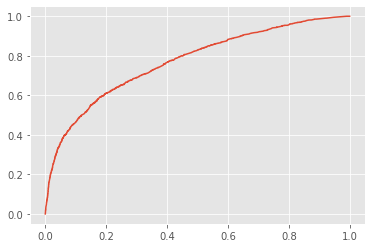

In [108]:
#logistic regression 
lr1=LogisticRegression(random_state=10)
lr1.fit(Xs_train,ys_train )
lr_pred1= lr1.predict(Xs_test)

#model evaluation , roc curve, roc score
evaluate(lr1,ys_test,lr_pred1)
roc_curve(ys_test,lr1.predict_proba(Xs_test)[:,1])
print (plt.plot(fpr,tpr))
print ("roc auc score for train data","\n", roc_auc_score(ys_train,lr1.predict_proba(Xs_train)[:,1]))
print ("roc auc score for test data ", "\n",roc_auc_score(ys_test,lr1.predict_proba(Xs_test)[:,1]))

significant improvement in f1 score of class 1 , smote =72%

improvement in roc-auc score from 71%  to 78%

##Decision Tree

Accuracy score traindata  0.7300975860297895
classification report of 
               precision    recall  f1-score   support

           0       0.73      0.74      0.73      5873
           1       0.73      0.72      0.73      5809

    accuracy                           0.73     11682
   macro avg       0.73      0.73      0.73     11682
weighted avg       0.73      0.73      0.73     11682

confusion matrix report of 
 [[4355 1518]
 [1635 4174]]
Cross tab 
 col_0     0     1
row_0            
0      4355  1518
1      1635  4174
roc auc score for train data 
 0.8313230447473812
roc auc score for test data  
 0.8049941557187824


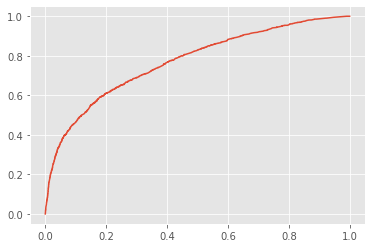

In [109]:
#decision tree
dt1=DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=3,min_samples_leaf=2,random_state=10,max_features=10)
dt1.fit(Xs_train,ys_train)
dt1_pred= dt1.predict(Xs_test)

#model evaluate, roc curve, roc-auc score
evaluate(dt1,ys_test,dt1_pred)
roc_curve(ys_test,dt1.predict_proba(Xs_test)[:,1])
print (plt.plot(fpr,tpr))
print ("roc auc score for train data","\n", roc_auc_score(ys_train,dt1.predict_proba(Xs_train)[:,1]))
print ("roc auc score for test data ", "\n",roc_auc_score(ys_test,dt1.predict_proba(Xs_test)[:,1]))

significant improvement in f1 score for class1 - from 53% to 73%

roc score imp from   75% to 80%

##Random Forest classifer

Accuracy score traindata  0.7676767676767676
classification report of 
               precision    recall  f1-score   support

           0       0.75      0.82      0.78      5873
           1       0.79      0.72      0.75      5809

    accuracy                           0.77     11682
   macro avg       0.77      0.77      0.77     11682
weighted avg       0.77      0.77      0.77     11682

confusion matrix report of 
 [[4790 1083]
 [1631 4178]]
Cross tab 
 col_0     0     1
row_0            
0      4790  1083
1      1631  4178
roc auc score for train data 
 0.866119495625052
roc auc score for test data  
 0.8410980870498191


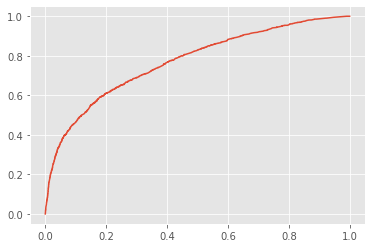

In [110]:
#Randomforest 
rf1= RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=8, min_samples_split=5, min_samples_leaf=3,random_state=10)
rf1.fit(Xs_train,ys_train)
rf1_pred=rf1.predict(Xs_test)

#model evalution, roc curve, roc auc score
evaluate(rf1,ys_test,rf1_pred)
roc_curve(ys_test,rf1.predict_proba(Xs_test)[:,1])
print (plt.plot(fpr,tpr))
print ("roc auc score for train data","\n", roc_auc_score(ys_train,rf1.predict_proba(Xs_train)[:,1]))
print ("roc auc score for test data ", "\n",roc_auc_score(ys_test,rf1.predict_proba(Xs_test)[:,1]))

improvement in class1 f1 score from 55% to 75%

improvement in roc-auc score from 78% to 84%

Of all techniques used above, SMOTE gave the best results!